In [59]:
import pandas as pd
import networkx as nx

In [60]:
PHILOSOPHY = "https://en.wikipedia.org/wiki/Philosophy"

In [61]:
edges = pd.read_csv(
    "../outputs/wiki_web.tsv",
    delimiter="\t",
    header=None,
    names=["source", "target"]
)

seeds = pd.read_table(
    "../outputs/seeds.txt",
    delimiter="\t",
    header=None,
    names=["url"]
).assign(color="green")
seeds = pd.concat([
    seeds,
    pd.DataFrame([{"url": PHILOSOPHY, "color": "red"}])
], ignore_index=True).set_index("url")["color"].to_dict()


In [71]:
nodes = (
    pd.concat([pd.Series(PHILOSOPHY), edges.source, edges.target])
    .drop_duplicates(ignore_index=True)
    .to_frame("url")
    .assign(color = lambda df: df.url.map(seeds).fillna("blue"))
)
url_to_node_id = (
    nodes
    .reset_index()
    .set_index("url")
    ["index"]
    .to_dict()
)

In [72]:
edges["source_id"] = edges.source.map(url_to_node_id)
edges["target_id"] = edges.target.map(url_to_node_id)

In [73]:
G = nx.Graph()
G.add_nodes_from([(i,dict(d)) for i,d in nodes.iterrows()])
G.add_edges_from(edges[["source_id", "target_id"]].values)



In [86]:
shortest_paths = nx.all_pairs_shortest_path(G)
node_id, shortest_path_from_philosophy = next(shortest_paths)
assert node_id == 0
distance_from_philosophy = {k: len(v)-1 for k,v in shortest_path_from_philosophy.items()}
distance_from_philosophy
#TODO: make sure the keys aren't np.int64

{0: 0,
 np.int64(12): 1,
 np.int64(13): 1,
 np.int64(56): 1,
 np.int64(11): 2,
 np.int64(70): 2,
 np.int64(14): 2,
 np.int64(55): 2,
 np.int64(10): 3,
 np.int64(69): 3,
 np.int64(15): 3,
 np.int64(54): 3,
 np.int64(9): 4,
 np.int64(20): 4,
 np.int64(68): 4,
 np.int64(16): 4,
 np.int64(53): 4,
 np.int64(8): 5,
 np.int64(19): 5,
 np.int64(67): 5,
 np.int64(17): 5,
 np.int64(52): 5,
 np.int64(62): 5,
 np.int64(7): 6,
 np.int64(18): 6,
 np.int64(66): 6,
 np.int64(51): 6,
 np.int64(61): 6,
 np.int64(6): 7,
 np.int64(65): 7,
 np.int64(50): 7,
 np.int64(60): 7,
 np.int64(1): 8,
 np.int64(64): 8,
 np.int64(49): 8,
 np.int64(59): 8,
 np.int64(63): 9,
 np.int64(48): 9,
 np.int64(58): 9,
 np.int64(5): 10,
 np.int64(47): 10,
 np.int64(57): 10,
 np.int64(3): 11,
 np.int64(4): 11}

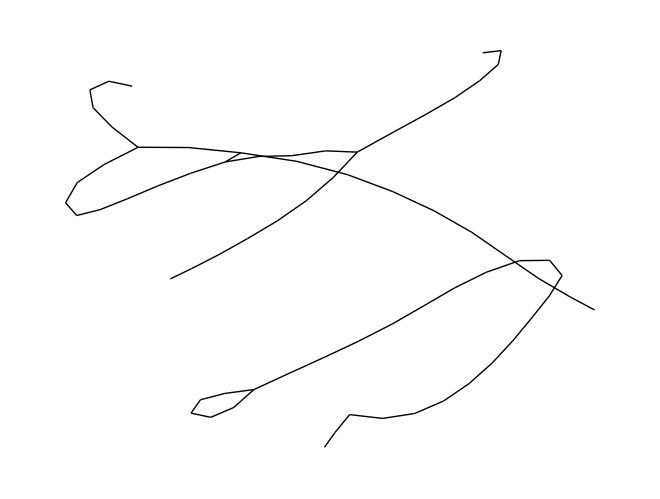

In [65]:
nx.draw(
    G,
    node_color=[G.nodes[node]["color"] for node in G.nodes()],
    node_size=0,
    with_labels=False,
)